## Assignment Matplotlib
#### submitted by Rishabh Bisht

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. 

Task: 
 
1. fitting it to the periodic function 
 
2. plot the fit 
 
Data 
 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 

https://www.youtube.com/watch?v=Jl-Ye38qkRc


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import optimize

%matplotlib inline


In [2]:
# f = interpolate.interp1d(x, Mxm, kind = 'cubic')
# xnew = np.linspace(1, 12,30)
# plt.plot(x, Mxm, 'ro', xnew, f(xnew), 'r-', )

In [3]:
# spl = interpolate.UnivariateSpline(x, Mxm)
# spl.set_smoothing_factor(10)
# plt.plot(x, Mxm, 'o', xnew, spl(xnew), 'g', lw = 3)
# plt.show()

### g(x)= a + a1 * cos( 2nπ * f(x))

In [4]:
def fun(x, a, a1, omega):
    return a + a1 * np.cos( 2 * np.pi * (x+omega) / x.max() )

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

In [5]:
res_max, cov_max = optimize.curve_fit(fun, months, temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(fun, months, temp_min, [20, 10, 0])

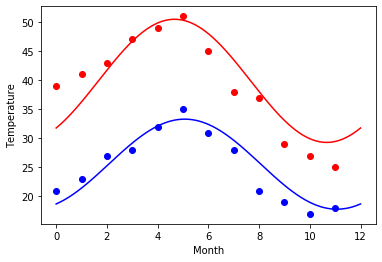

In [6]:
days = np.linspace(0, 12, num=365)

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.plot(months, temp_max, 'ro')
plt.plot(days, fun(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, fun(days, *res_min), 'b-')


This assignment is for visualization using matplotlib: 
 
data to use: 
 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 
 
titanic = pd.read_csv(url) 
 
Charts to plot: 
 
1. Create a pie chart presenting the male/female proportion 
 
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 
 


In [7]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


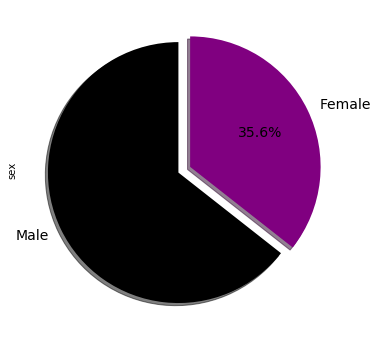

In [25]:
titanic["sex"].value_counts().plot(kind="pie",labels = ["Male","Female"] , figsize=(6,6), explode = (.05,.05), colors= ["Black","Purple"] , autopct='%1.1f%%',textprops={'fontsize': 14}, startangle=90,shadow=True)

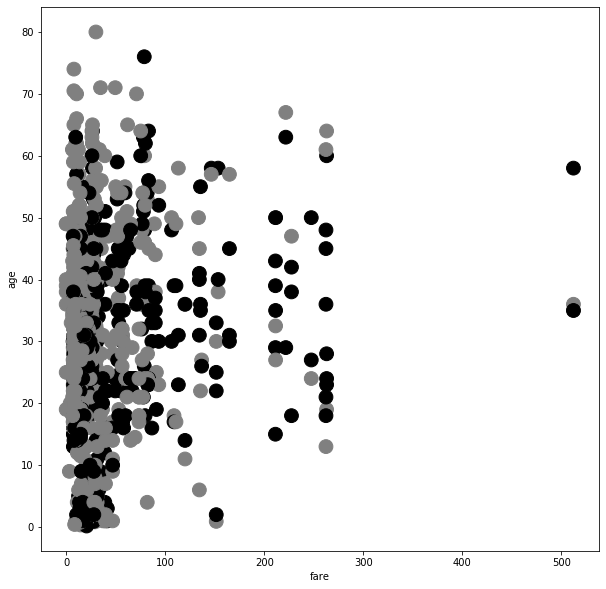

In [16]:
colors = {'male':'grey', 'female':'black', np.nan : 'red'}
titanic.plot.scatter(x = 'fare', y = 'age' ,  c = titanic['sex'].apply(lambda x: colors[x]), figsize = (10,10) , s=190)